## California house price prediction

#### We will be working on the California House Price Dataset provided by Kaggle.This is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'.The data contains information from #### the 1990 California census.The data pertains to the houses found in a given California district. We need to predict the priceof the house based on various features that we see in the dataset.

#### The columns are as follows, their names are pretty self explanitory: 
#### Longitude: A measure of how far west a house is.
#### Latitude: A measure of how far north a house is.
#### housingMedianAge: Median age of a house within a block where a lower number is a newer building.
#### totalRooms: Total number of rooms within a block.
#### totalBedrooms: Total number of bedrooms within a block
#### population: Total number of people residing within a block
#### households: Total number of households, a group of people residing within a home unit, for a block
#### medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
#### medianHouseValue: Median house value for households within a block (measured in US Dollars). Median House value is 
#### better than other averages as it is not influenced by extreme values.
#### oceanProximity: Location of the house w.r.t ocean/sea.

### Step1:( Business Understanding)

### Our goal for this project is to predict housing prices in California based on the data we have already collected. We want to predict what a house would cost based on several attributes like number of bedrooms, location, housing value etc. This is a linear regression problem. 

### Step 2: Data Understanding

In [16]:
# First we import all necessary libraries for our project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats

In [17]:
import warnings
warnings.filterwarnings('ignore')       # Ignore any warnings that may encounter
sns.set_theme(style='whitegrid', context='paper', palette='pastel', font='Georgia', font_scale=1.2)

In [18]:
## Loading the required dataset

df= pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.shape

## Exploratory data analysis

In [19]:
## Summary statistics

df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [20]:
## Checking for data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [21]:
## Checking for null values

df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

##### We observe that there are null values in 'total_bedrooms'. There are a few ways one can deal with Missing values such as:
##### 1. Filling with any statistical values(mean, median, mode)
##### 2. Using ffill, bfill. 
##### 3. Dropping if features are not required
##### 4. Use linear regression

##### We will impute using statistic values such as mean, median and mode.

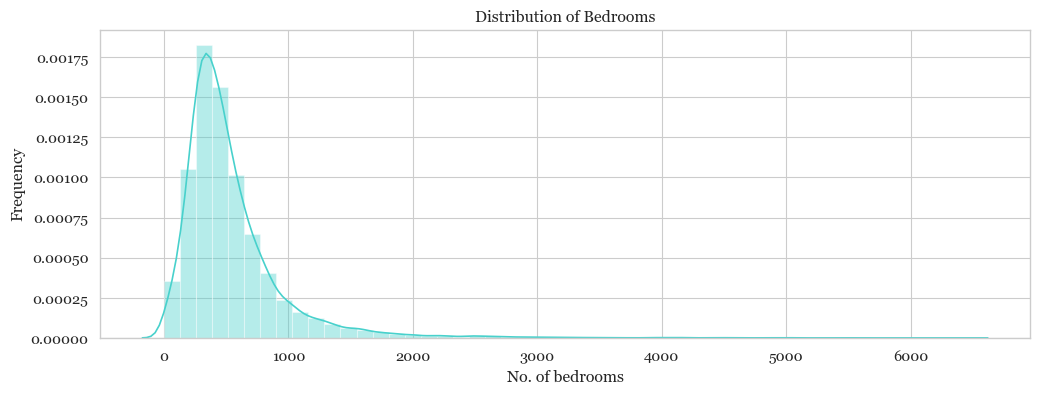

In [23]:
# Distribution of Total Bedrooms

plt.figure(figsize=(12,4))
sns.distplot(x=df['total_bedrooms'], color='mediumturquoise')
plt.title('Distribution of Bedrooms')
plt.xlabel('No. of bedrooms')
plt.ylabel('Frequency')
plt.show()

##### Total Bedrooms is positively skewed. This means we will be using median since it works best for skewed distribution because  mean is sensitive to skewness of the data. 

In [25]:
#-- Filling null values in total bedrooms 

df['total_bedrooms'].fillna(value=df['total_bedrooms'].median(), inplace=True)    

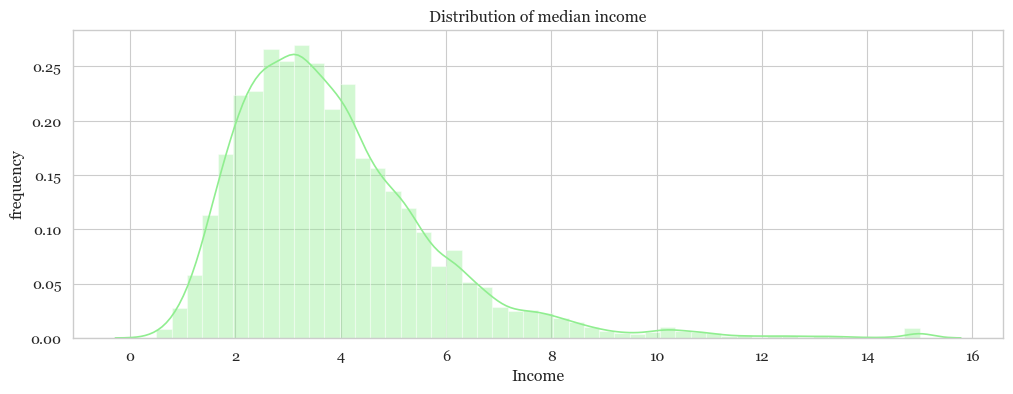

In [26]:
#-- Distribution of median income

plt.figure(figsize=(12,4))
sns.distplot(x=df['median_income'], color='lightgreen')
plt.title('Distribution of median income')
plt.xlabel('Income')
plt.ylabel('frequency')
plt.show()

##### This is somewhat a positively skewed distribution. The plot indicates that most of the people have income within the same range with a few who lie on the further side.

In [28]:
#-- Ocean proximity is our only column that is non-numerical. We will check its different types and count

df['ocean_proximity'].dtype

dtype('O')

In [29]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

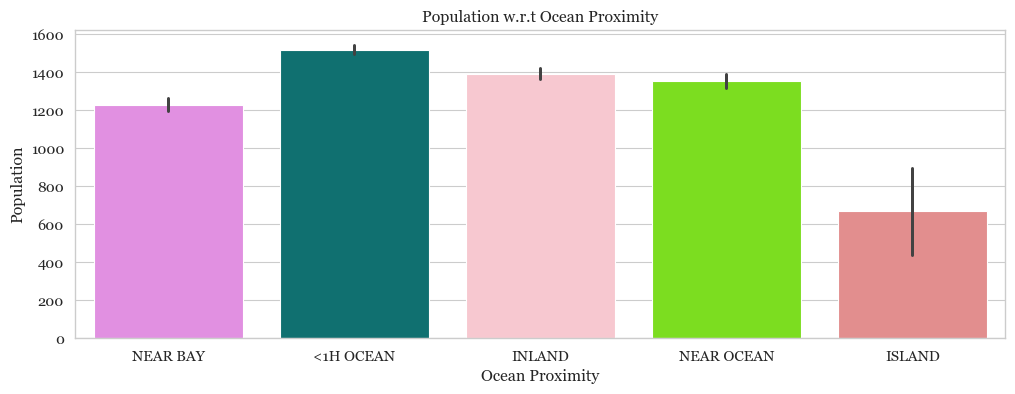

In [30]:
#-- We will check the Population in California based on ocean proximity.

plt.figure(figsize=(12,4))
sns.barplot(x='ocean_proximity', y='population', data=df, palette=['violet', 'teal', 'pink', 'lawngreen', 'lightcoral'])
plt.title('Population w.r.t Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Population')
plt.show()

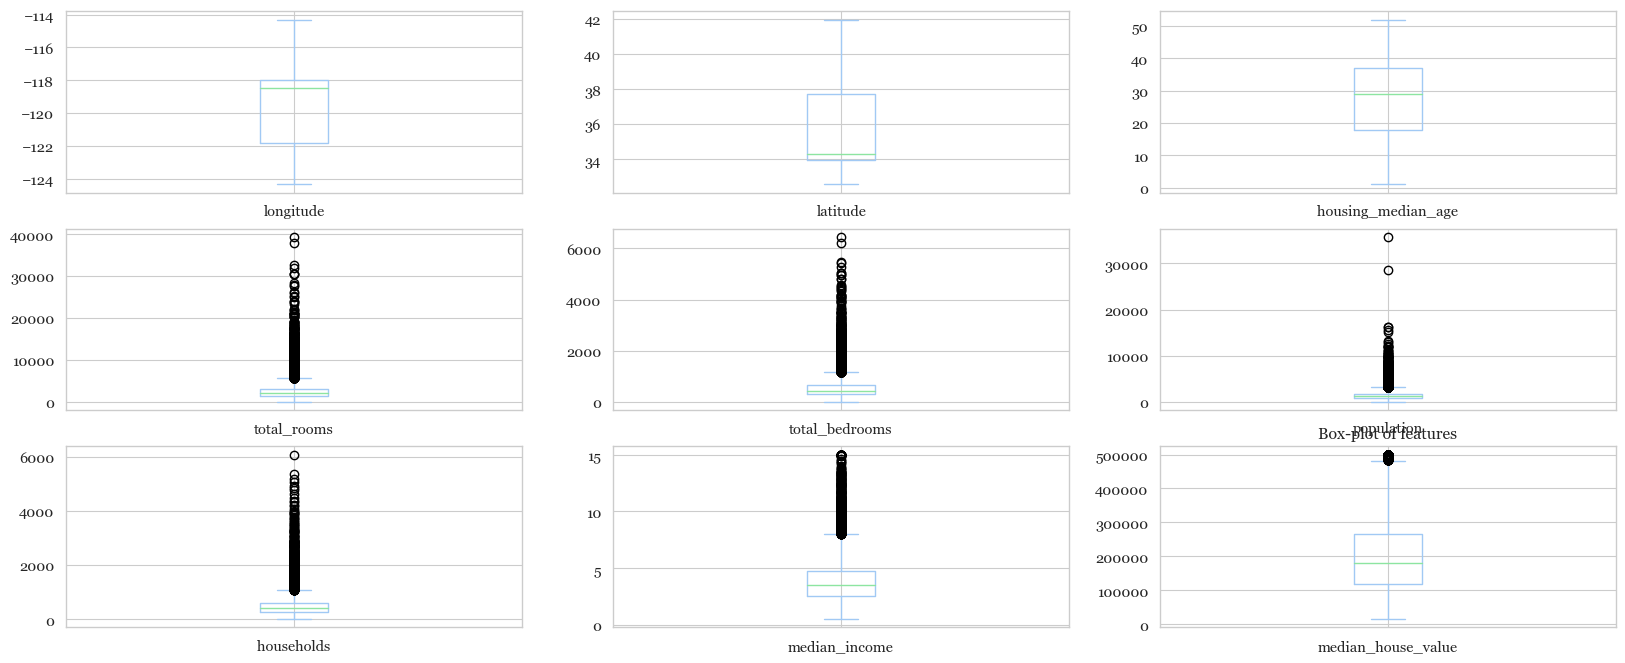

In [31]:
#-- Boxplot of all the variables in the dataset

df.plot(kind='box', subplots=True, layout=(3,3), figsize=(20,8))
plt.title('Box-plot of features')
plt.show()

####   Lets create a new   column using 'housing_median_age'  where    any   house   greater than 30 is old indicated by (0)   and     less than 30 is new indiacted by (1).    We will create this column to be used in plots.

In [33]:
#-- Creating a new column for EDA

df['house_age']= [1 if x<30 else 0 for x in df['housing_median_age']]

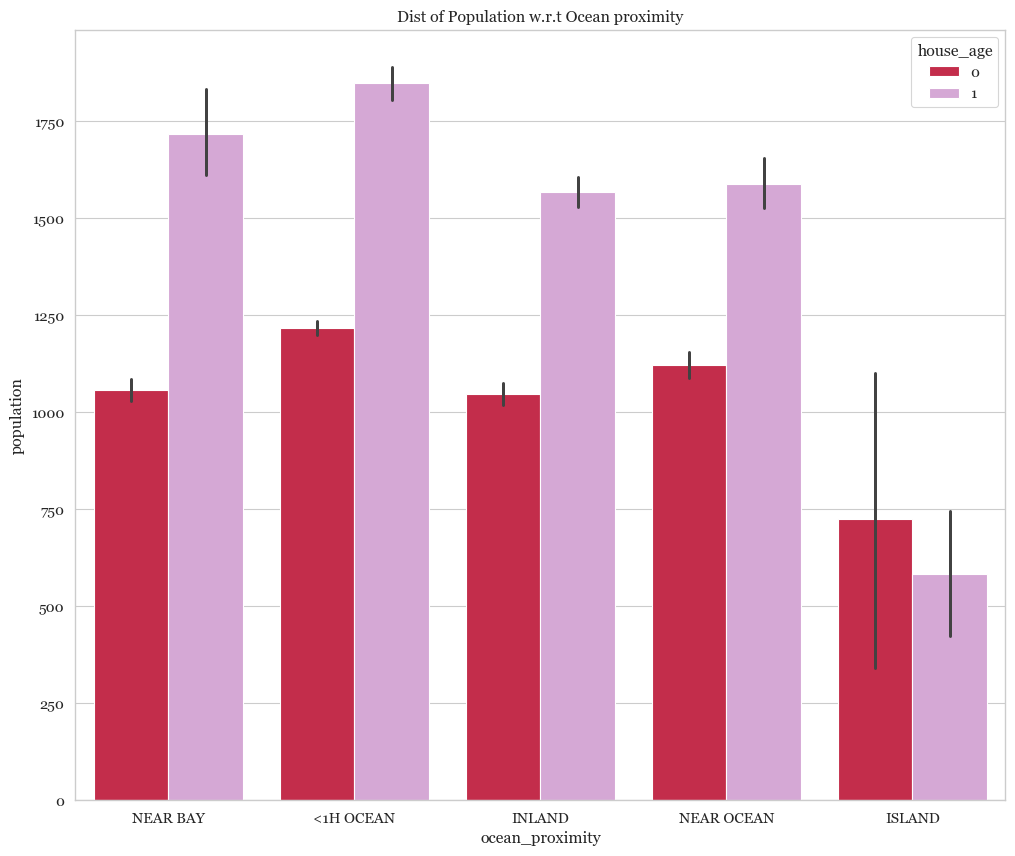

In [34]:
#-- Population distribution based on house age

plt.figure(figsize=(12,10))
color=['crimson', 'plum']
sns.barplot(x='ocean_proximity', y='population', data=df, hue='house_age', palette= color)
plt.title('Dist of Population w.r.t Ocean proximity')
plt.xlabel('ocean_proximity')
plt.ylabel('population')
plt.show()

In [35]:
## Geospatial Visualisation

In [36]:
!pip install folium pandas

In [37]:
#-- Geospatial Visualisation

geo_df = df[['longitude', 'latitude']].head(10)
import folium
map_center = [geo_df['latitude'].mean(), geo_df['longitude'].mean()]   # Centre the map based on the mean coordinates
zoom_level = 4   # We can adjust the zoom level as needed
map_object = folium.Map(location= map_center, zoom_start=zoom_level)

# Add markers for each city on the map
for _, row in geo_df.iterrows():
    folium.Marker(location= [row['latitude'], row['longitude']]).add_to(map_object)
    
map_object

<Figure size 1000x700 with 0 Axes>

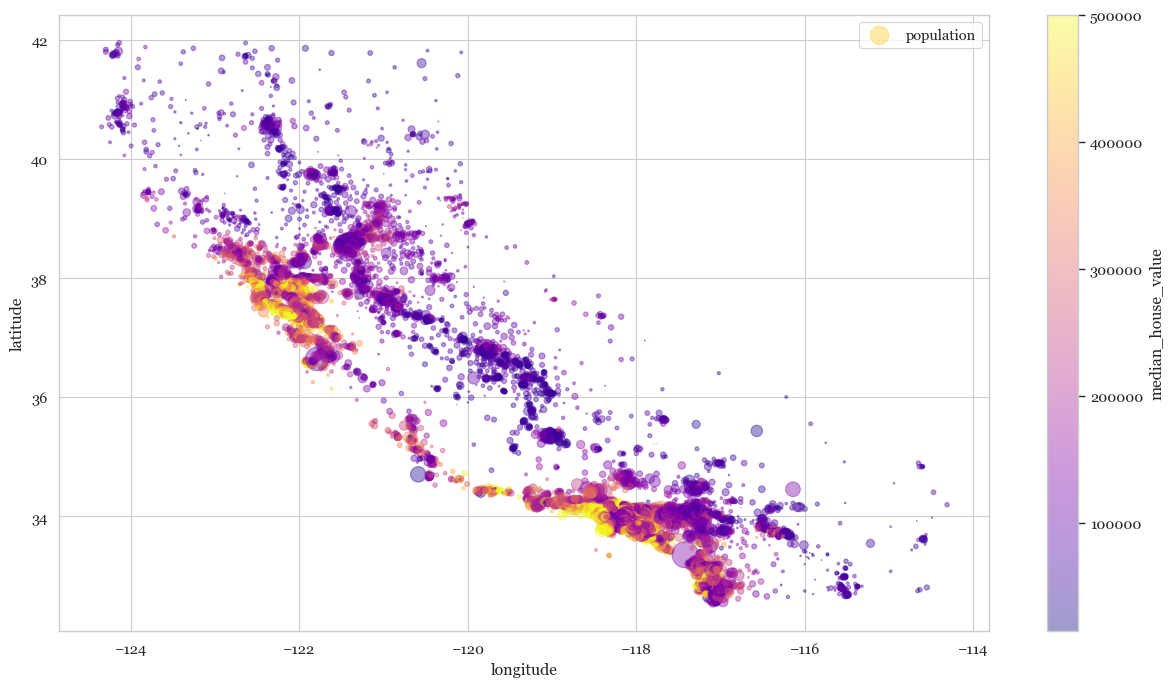

In [38]:
#-- Population based on location

plt.figure(figsize=(10,7))
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
        s= df['population']/100, label='population', figsize=(15,8),
        c= 'median_house_value', cmap='plasma', colorbar=True)
plt.legend()

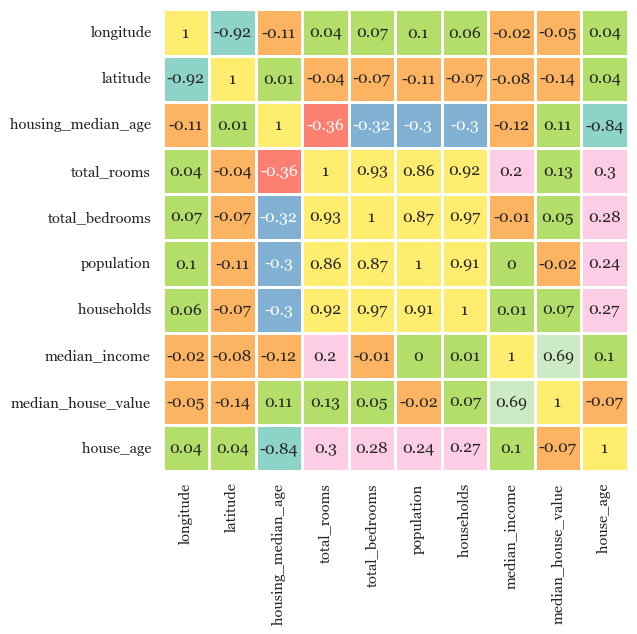

In [39]:
#--Correlation matrix

def corrMat(df,id=False):
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(6,6))
    sns.heatmap(corr_mat,vmin=-1,vmax=1,center=0, 
                cmap='Set3',square=False,lw=2,annot=True,cbar=False)
    plt.show()  
corrMat(df)

In [40]:
#-- Encoding categorical variables

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded_data = pd.DataFrame(encoder.fit_transform(
    df[['ocean_proximity']]).toarray())

final_df = df.join(encoded_data)

final_df.rename(columns = {0:'Ocean',1:'Inland',2:'Island',3:'Near Bay',4:'Near Ocean'}, inplace = True)
final_df.reset_index(inplace = True)

In [41]:
final_df.drop(columns = {'index'}, inplace = True)
final_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,house_age,Ocean,Inland,Island,Near Bay,Near Ocean
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0.0,0.0,0.0,1.0,0.0


In [ ]:
## Model Building

In [ ]:
#-- Train And Test dataset

In [42]:
X= final_df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 'Ocean', 'Inland',
       'Island', 'Near Bay', 'Near Ocean']]
Y= final_df[['median_house_value']]

In [43]:
#-- Splitting the dataset

from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(X,Y, random_state=42, test_size=0.30)

##### Since,we are dealing with a regression model since the target variable is numeric in nature  There are various regression models we can use such as Linear Regression, Bayesain Linear Regression, Decison Trees,  support Vector etc.

##### Our work flow will be as follows:-
##### 1.Build all the regression models
##### 2.Choose the best regression model based on the performance.
##### 3.Insights on the coefficeints.

##### Before model building let us examine any presence of multicolinearity in our model.

In [48]:
#-- Variance Inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df= pd.DataFrame()
vif_x = X.copy()
vif_df['feature']= vif_x.columns
vif_df['VIF']= [variance_inflation_factor(vif_x.values, i) for i in range(len(vif_x.columns))]
vif_df.head()

,feature,VIF
0,longitude,18.028444
1,latitude,19.925764
2,housing_median_age,1.321927
3,total_rooms,12.349114
4,total_bedrooms,27.040073


###### We observe that total_rooms and total_bedrooms have very high values of VIF, indicating that these two variables are highly correlated which is obvious since total_rooms does influence their total_bedrooms as with median
###### Income and population. Since, this VIF is due to the collection of data itself let us not bother with it and make our model.

In [49]:
#-- Linear Regression

from sklearn.linear_model import LinearRegression
lr_model= LinearRegression().fit(X_train, Y_train)

In [ ]:
# Here on we'll be using GridSearch to find the best model among Decision Trees, Random Forest,Lasso and Ridge Regression 
# by tuning the parameters and finding the best paramter value.
# For the purpose mentioned above I've created a User Definded Function to find the best model.

In [50]:
#--Importing GridsearchCV for best model
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit

In [51]:
#-- Function for selectiong the best model


def best_model_selection(X,y):
    models = {
        'Decision Tree Regression' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'max_depth': [None, 5, 10, 15],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'max_features': ['auto', 'sqrt', 'log2']}
        },
        'Ridge Regression' : {
            'model' : Ridge(),
            'params': {
                'alpha': [0.1, 0.5, 1.0, 10.0]}
        },
        'Lasso Regression' : {
            'model' : Lasso(),
            'params' : {
                'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
            }
        },
        'Random Forest Regressor ' : {
            'model': RandomForestRegressor(),
            'params' : {
                'n_estimators': [10, 20, 30]
            }
        },
        
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.30, random_state=0)
    for model_name, config in models.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': model_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

best_model_selection(X_train,Y_train)

,model,best_score,best_params
0,Decision Tree Regression,0.710540,"{'max_depth': 10, 'max_features': 'auto', 'min..."
1,Ridge Regression,0.645865,{'alpha': 1.0}
2,Lasso Regression,0.645794,{'alpha': 10.0}
3,Random Forest Regressor,0.800789,{'n_estimators': 30}


In [53]:
#--Building all the best models
best_linear = LinearRegression().fit(X_train, Y_train)
best_lasso = Lasso(alpha = 1).fit(X_train, Y_train)
best_ridge = Ridge(alpha = 10).fit(X_train, Y_train)
best_dc = DecisionTreeRegressor(max_depth = 10, max_features = 'auto', min_samples_leaf = 4,min_samples_split = 10).fit(X_train, Y_train)
best_rfr = RandomForestRegressor(n_estimators = 30).fit(X_train, Y_train)

In [55]:
#--Y_pred for all the models
y_pred_linear = best_linear.predict(x_test)
y_pred_lasso = best_lasso.predict(x_test)
y_pred_ridge = best_ridge.predict(x_test)
y_pred_dc = best_dc.predict(x_test)
y_pred_rfr = best_rfr.predict(x_test)

#### Now, it is time to evaluate the performance of our models using Mae, Mse and R2 score. Here MAE and MSE indicate the magnitude of the errors made by our model, whereas R2 score provides an indication of how well the model explains the variance in the target variable. Lower MAE and MSE values are desired, while a higher R2 score indicates a better fit of the model to the data.

In [57]:
#--Evaluation metrics for regression models
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [58]:
#--Mean Absolute Error
mae_linear = mae(y_test,y_pred_linear)
mae_lasso = mae(y_test,y_pred_lasso)
mae_ridge = mae(y_test,y_pred_ridge)
mae_dc = mae(y_test,y_pred_dc)
mae_rfr = mae(y_test,y_pred_rfr)

In [59]:
#--Mean Squared Error
mse_linear = mse(y_test,y_pred_linear)
mse_lasso = mse(y_test,y_pred_lasso)
mse_ridge = mse(y_test,y_pred_ridge)
mse_dc = mse(y_test,y_pred_dc)
mse_rfr = mse(y_test,y_pred_rfr)

In [60]:
#--Coefficient of determination
r2_linear = r2_score(y_test,y_pred_linear)
r2_lasso = r2_score(y_test,y_pred_lasso)
r2_ridge = r2_score(y_test,y_pred_ridge)
r2_dc = r2_score(y_test,y_pred_dc)
r2_rfr = r2_score(y_test,y_pred_rfr)

In [61]:
#--Evaluation Metrics df
eval_df = pd.DataFrame({'MAE':[mae_linear,mae_lasso,mae_ridge,mae_dc,mae_rfr], 
                        'MSE':[mse_linear,mse_lasso,mse_ridge,mse_dc,mse_rfr],
                       'R2 Score' : [r2_linear,r2_lasso,r2_ridge,r2_dc,r2_rfr], 
                    'Model': ['Linear Regression','Lasso Regression','Ridge Regression','Decision Trees','Random Forest']})
eval_df.head()

,MAE,MSE,R2 Score,Model
0,50078.098842,4.733529e+09,0.639361,Linear Regression
1,50079.193513,4.733672e+09,0.639350,Lasso Regression
2,50104.233599,4.738304e+09,0.638997,Ridge Regression
3,40916.330104,3.641893e+09,0.722531,Decision Trees
4,31997.636224,2.406491e+09,0.816654,Random Forest


#### Based on the evaluation df we can see that Random Forest outperforms rest of the models with 81% of variation exaplained and has the lower MAE and MSE score as desired for a good model.

#### Let us examine the coefficients of Random Forest Regressor.  
#### The values given below tells us about the importance of feature with its importance. Our model has high VIF features which renders our interpretibility and makes interpretiting our coefficients difficult.

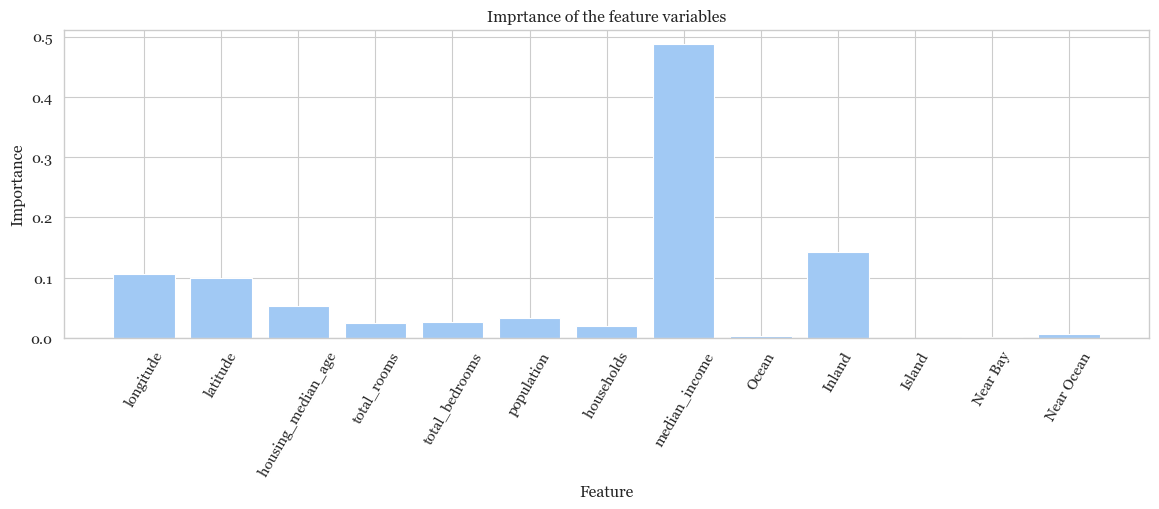

In [64]:
#--Visulaizing coefficients of Random Forest
plt.figure(figsize = (14,4))
plt.bar(X.columns, best_rfr.feature_importances_)
plt.title('Imprtance of the feature variables')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation = 60)
plt.show()

## Conclusion-
### 1. We started off with california housing price dataset with 20640 rows and 10 columns.
### 2. We encountered missing values in total_bedroom and imputed with its median because of skewness.
### 3. Further we analysed correlation matrix and geospatial visualization.
### 4. Then we build our regression models and chose the best using Grid Search.
### 5. Overall, our model is satisfactory